# Implemting the Training Loop

### Setting Up the Model, Loss, and Optimizer

In [2]:
import torch

# Determine the available device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Move the model to the chosen device
# model.to(device)

# Executing model.to(device) modifies the model in place, 
# moving all its parameters and buffers to the GPU memory if CUDA is available, 
# otherwise keeping them on the CPU. 

Using cpu device


In [3]:
# loss function

# For multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# For regression problems (predicting continuous values)
# loss_fn = torch.nn.MSELoss() # Mean Squared Error Loss

When initializing an optimizer, you must provide two essential arguments:

* **The model's parameters**: You tell the optimizer which tensors it should update. This is easily done using `model.parameters()`, which returns an iterator over all trainable parameters in the model.
* **The learning rate (`lr`)**: This hyperparameter controls the step size for parameter updates. Finding a good learning rate is important for effective training. It often requires experimentation.

In [4]:
import torch.optim as optim

# Using Stochastic Gradient Descent (SGD)
learning_rate = 0.01
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Alternatively, using the Adam optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.001)

### Iterating Through Data with DataLoader

In [5]:
# Assume these are already defined and configured:
# train_dataloader = DataLoader(your_dataset, batch_size=64, shuffle=True)
# model = YourNeuralNetwork()
# loss_fn = torch.nn.CrossEntropyLoss() # Example loss function
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Example optimizer
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device) # Ensure model is on the correct device

num_epochs = 10 # Example number of passes over the dataset

In [6]:
# # Outer loop for epochs
# for epoch in range(num_epochs):
#     print(f"Epoch {epoch+1}\n-------------------------------")

#     # Set the model to training mode.
#     # This enables features like dropout and batch normalization updates.
#     model.train()

#     # Inner loop for batches within an epoch
#     # Iterate over batches provided by the DataLoader
#     for batch_idx, data_batch in enumerate(train_dataloader):
#         # 1. Unpack the batch
#         # The structure depends on your Dataset's __getitem__ method.
#         # For supervised learning, it's commonly (inputs, labels).
#         inputs, labels = data_batch

#         # 2. Move data to the target device (GPU or CPU)
#         # This MUST match the device where the model resides.
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         # ---> The next steps (forward pass, loss, backprop, optimize) <---
#         # ---> using 'inputs' and 'labels' happen here.             <---
#         # (These are detailed in the subsequent sections)

#         # Example placeholder for where subsequent logic goes:
#         # predictions = model(inputs)
#         # loss = loss_fn(predictions, labels)
#         # optimizer.zero_grad()
#         # loss.backward()
#         # optimizer.step()

#         # Optional: Print progress periodically
#         if batch_idx % 100 == 0:
#             current_batch_size = len(inputs) # Get size of the current batch
#             # Replace 0.0 with the actual calculated loss for logging
#             current_loss = 0.0
#             print(f"  Batch {batch_idx}: [{current_batch_size} samples] Current Loss: {current_loss:.4f}") # Example log

#     # ---> Evaluation loop on validation data often follows here <---
#     # (We'll cover evaluation loops later in this chapter)

# print("Training finished!")

### The Forward Pass: Getting Predictions

In [7]:
# Implementing the Forward Pass

# Assume 'model' is an instance of your nn.Module subclass
# Assume 'data_batch' is loaded from the DataLoader
# Assume 'device' is defined (e.g., 'cuda' or 'cpu')

# Unpack the batch (adjust based on your DataLoader structure)
# inputs, labels = data_batch
# inputs = inputs.to(device) # Move input data to the correct device
# labels = labels.to(device) # Move labels to the correct device (needed for loss)

# # --- The Forward Pass ---
# # Pass inputs through the model
# outputs = model(inputs)
# -----------------------

# 'outputs' now contains the model's predictions for the 'inputs' batch.
# The next step will be to calculate the loss using these 'outputs' and 'labels'.

_Data flow during the forward pass: A batch is loaded, inputs are prepared and sent to the appropriate device, then passed through the model to produce outputs._

### Calculating the Loss

In [8]:
# Computing the Loss in PyTorch

# --- Inside the training loop ---

# Assume:
# model: Your neural network model (e.g., an nn.Module instance)
# criterion: Your chosen loss function (e.g., nn.CrossEntropyLoss())
# inputs: Batch of input data from DataLoader
# labels: Batch of corresponding true labels from DataLoader

# 1. Forward Pass (already done)
# outputs = model(inputs)

# 2. Calculate the Loss
# loss = criterion(outputs, labels)

# 'loss' now holds the computed loss value for the current batch.
# It's a scalar tensor (a tensor with only one element).

# 3. Next steps: Backpropagation (loss.backward()), Optimizer step...
# --- End of loop iteration snippet ---

### Updating Weights with the Optimizer

In [9]:
# Assume model, criterion, and optimizer are already defined
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# ... Inside the training loop for one batch ...

# Forward pass
# outputs = model(inputs)

# Calculate loss
# loss = criterion(outputs, labels)

# Backpropagation - compute gradients
# loss.backward()

# Update weights using the optimizer
# optimizer.step()

Calling `optimizer.step()` iterates through all the parameters registered with the optimizer during its initialization. For each parameter `p`, it uses the gradient stored in `p.grad` to update the parameter's value `p.data`.

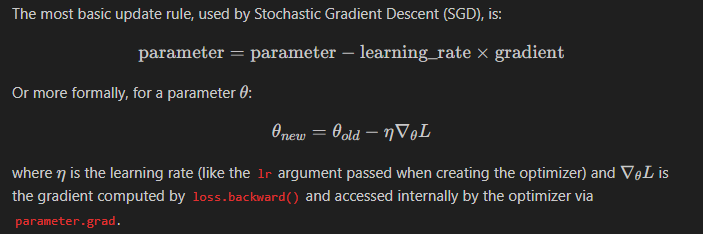

### Zeroing Gradients

Consider what happens over multiple iterations of the training loop if you don't address this:

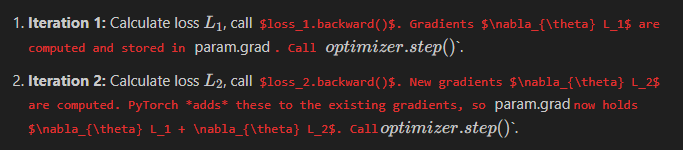

The optimizer step in iteration 2 uses incorrect gradient information. It uses a mix of gradients from the current batch and the previous batch. This prevents the model from learning effectively, as the weight updates are based on stale and combined gradient signals from different data points.

In [10]:
# # where to call `optimizer.zero_grad()`

# # Example Training Loop Snippet
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# for epoch in range(num_epochs):
#     for inputs, labels in dataloader:
#         # 1. Zero the gradients from the previous iteration
#         optimizer.zero_grad()

#         # 2. Forward pass: compute predicted outputs
#         outputs = model(inputs)

#         # 3. Calculate the loss
#         loss = criterion(outputs, labels)

#         # 4. Backward pass: compute gradient of the loss w.r.t. parameters
#         loss.backward()

#         # 5. Perform a single optimization step (parameter update)
#         optimizer.step()

#     # ... (Evaluation, logging, etc.) ...

### Implementing an Evaluation Loop

In [11]:
# Structure of the Evaluation Loop

import torch

def evaluate_model(model, dataloader, criterion, device):
    """Evaluates the model on the provided dataset."""
    
    model.eval() # set model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    with torch.no_grad(): #disable gradient calculations
        for inputs, targets in dataloader:
            # move data to the same device as the model
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # forward pass
            outputs = model(inputs)
            
            # calculate loss (optional, but useful for monitoring)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * inputs.size(0) # accumulate batch loss
            
            # calculate accuracy (example for classification)
            _, predicted_labels = torch.max(outputs, dim=1)
            correct_predictions += (predicted_labels == targets).sum().item()
            total_samples += targets.size(0)
            
    # calculate average loss and accuracy for the entire dataset
    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
    
    model.train() # switch back to train mode if needed later
    return average_loss, accuracy

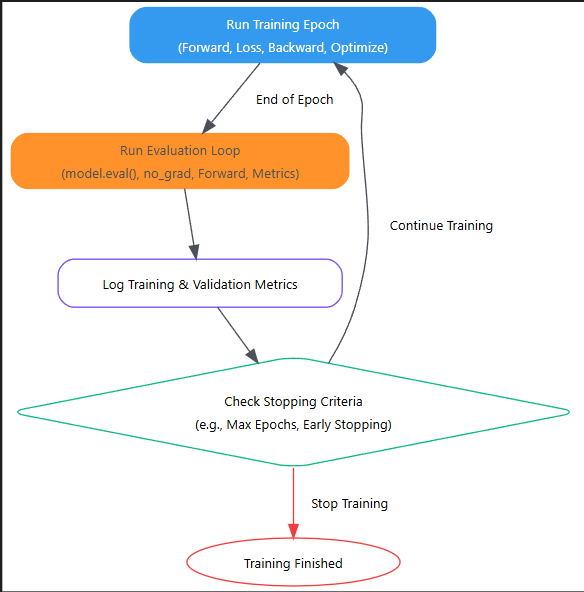

_Typical deep learning training workflow incorporating evaluation after each training epoch to monitor performance and make decisions about continuing or stopping training._

### Saving and Loading Model Checkpoints

In [12]:
# common pattern for saving a checkpoint within training loop:

# # Assume model, optimizer, epoch, loss are defined
# # PATH = "path/to/your/checkpoint.pth" # Define your save path

# checkpoint = {
#     'epoch': epoch + 1, # Save the next epoch number to start from
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'loss': loss, # Or maybe validation loss
#     # Add any other metrics or info you want to save
#     # 'validation_accuracy': val_acc,
# }

# torch.save(checkpoint, PATH)
# print(f"Checkpoint saved at epoch {epoch} to {PATH}")